In [1]:
import pandas as pd
from Models.funtions import *

In [5]:
df = pd.read_csv("./Dataset/join_table.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971976 entries, 0 to 971975
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Semana             971976 non-null  int64  
 1   Agencia_ID         971976 non-null  int64  
 2   Canal_ID           971976 non-null  int64  
 3   Ruta_SAK           971976 non-null  int64  
 4   Cliente_ID         971976 non-null  int64  
 5   Producto_ID        971976 non-null  int64  
 6   Venta_uni_hoy      971976 non-null  int64  
 7   Venta_hoy          971976 non-null  float64
 8   Dev_uni_proxima    971976 non-null  int64  
 9   Dev_proxima        971976 non-null  float64
 10  Demanda_uni_equil  971976 non-null  int64  
 11  NombreCliente      971976 non-null  object 
 12  Town               971976 non-null  object 
 13  State              971976 non-null  object 
 14  NombreProducto     971976 non-null  object 
dtypes: float64(2), int64(9), object(4)
memory usage: 11

In [7]:
df1 = pd.read_csv("./Dataset/0.df_final.csv")

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964348 entries, 0 to 964347
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Semana             964348 non-null  int64  
 1   Agencia_ID         964348 non-null  int64  
 2   Canal_ID           964348 non-null  int64  
 3   Ruta_SAK           964348 non-null  int64  
 4   Cliente_ID         964348 non-null  int64  
 5   Producto_ID        964348 non-null  int64  
 6   Venta_uni_hoy      964348 non-null  int64  
 7   Venta_hoy          964348 non-null  float64
 8   Dev_uni_proxima    964348 non-null  int64  
 9   Dev_proxima        964348 non-null  float64
 10  Demanda_uni_equil  964348 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 80.9 MB


In [3]:
df.columns

Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima',
       'Dev_proxima', 'Demanda_uni_equil', 'NombreCliente', 'Town', 'State',
       'NombreProducto'],
      dtype='object')

In [4]:
df.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreCliente,Town,State,NombreProducto
0,5,1936,1,1158,1575677,2425,60,270.0,0,0.0,60,JUAN CARLOS GOMEZ GOMEZ,2300 LEON MILENIUM,GUANAJUATO,Nito 1p 62g Central BIM 2425
1,3,1936,1,1164,4511404,2425,60,270.0,0,0.0,60,NO IDENTIFICADO,2300 LEON MILENIUM,GUANAJUATO,Nito 1p 62g Central BIM 2425
2,4,1936,1,1161,66167,2425,24,108.0,0,0.0,24,TERISUR,2300 LEON MILENIUM,GUANAJUATO,Nito 1p 62g Central BIM 2425
3,4,1936,1,1164,948201,2425,1,4.5,2,9.0,0,JORGE ALEJANDRO TRUJILLO,2300 LEON MILENIUM,GUANAJUATO,Nito 1p 62g Central BIM 2425
4,3,1936,1,1156,877954,2425,55,247.5,0,0.0,55,SILVIA RAMIREZ CASTRO,2300 LEON MILENIUM,GUANAJUATO,Nito 1p 62g Central BIM 2425


In [5]:
df["Dev_missing"] = df["Venta_uni_hoy"] - df["Dev_uni_proxima"]


In [11]:
df["Dev_pesos_missing"] = df["Venta_hoy"] - df["Dev_proxima"]

In [6]:
test = df[["Dev_missing","Demanda_uni_equil"]]

In [13]:
df["Dev_pesos_unit_missing"] = df["Dev_pesos_missing"] /df["Dev_missing"]

In [7]:
sum(test["Demanda_uni_equil"]) - sum(test["Dev_missing"])

38667

In [14]:
corr = df.corr()
corr["Demanda_uni_equil"].sort_values(ascending=False)

Demanda_uni_equil         1.000000
Dev_missing               0.997907
Venta_uni_hoy             0.996402
Venta_hoy                 0.792991
Dev_pesos_missing         0.781626
Canal_ID                  0.133306
Ruta_SAK                  0.053599
Producto_ID               0.046859
Dev_uni_proxima           0.043321
Dev_proxima               0.025421
Semana                    0.003484
Agencia_ID               -0.006390
Cliente_ID               -0.015822
Dev_pesos_unit_missing   -0.040626
Name: Demanda_uni_equil, dtype: float64

In [7]:
resume(df)

Dataset Shape: (971976, 15)


,Name,dtypes,Uniques,Duplicated,Min,Max,Null,Entropy,First Value,Second Value
0,Semana,int64,7,971969,3,9,0,2.81,5,3
1,Agencia_ID,int64,551,971425,1110,25759,0,8.09,1936,1936
2,Canal_ID,int64,9,971967,1,11,0,0.62,1,1
3,Ruta_SAK,int64,2264,969712,1,9930,0,9.60,1158,1164
4,Cliente_ID,int64,450788,521188,26,19988629,0,18.46,1575677,4511404
5,Producto_ID,int64,1308,970668,41,49997,0,7.46,2425,2425
6,Venta_uni_hoy,int64,614,971362,0,5000,0,3.87,60,60
7,Venta_hoy,float64,13671,958305,0.0,50353.22,0,9.37,270.0,270.0
8,Dev_uni_proxima,int64,134,971842,0,1241,0,0.31,0,0
9,Dev_proxima,float64,2515,969461,0.0,49500.0,0,0.50,0.0,0.0


Dataset Shape: (971976, 15)
Saving table final_table
Saving figure Semana
Saving figure Agencia_ID
Saving figure Canal_ID
Saving figure Ruta_SAK
Saving figure Cliente_ID
Saving figure Producto_ID
Saving figure Venta_uni_hoy
Saving figure Venta_hoy
Saving figure Dev_uni_proxima
Saving figure Dev_proxima
Saving figure Demanda_uni_equil
Saving figure NombreCliente
Saving figure Town
Saving figure State
Saving figure NombreProducto


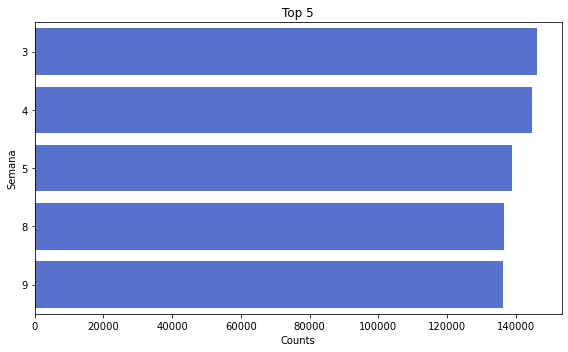

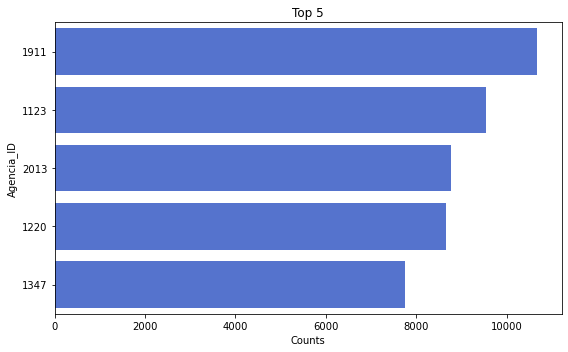

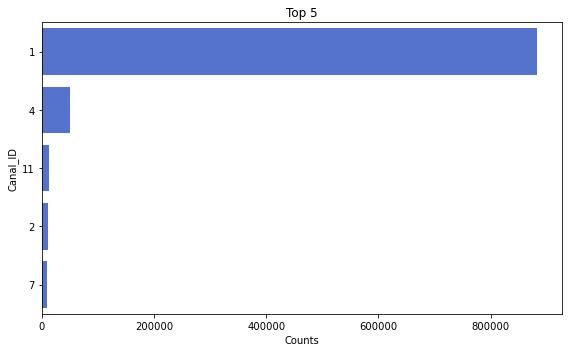

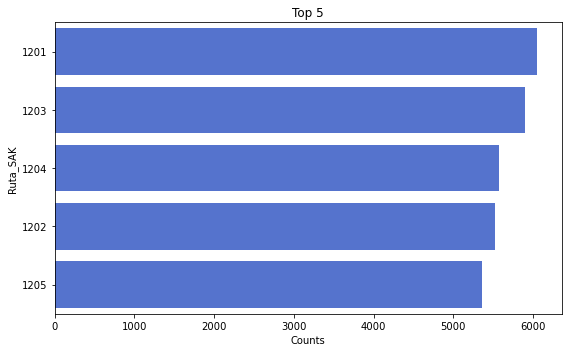

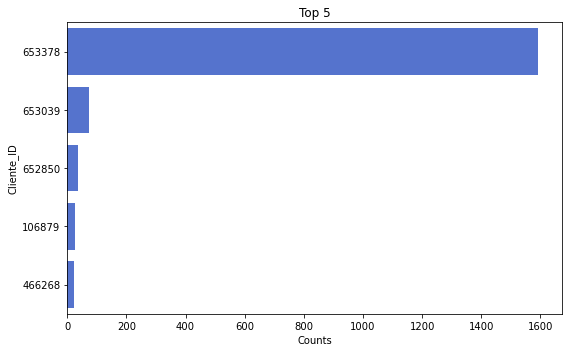

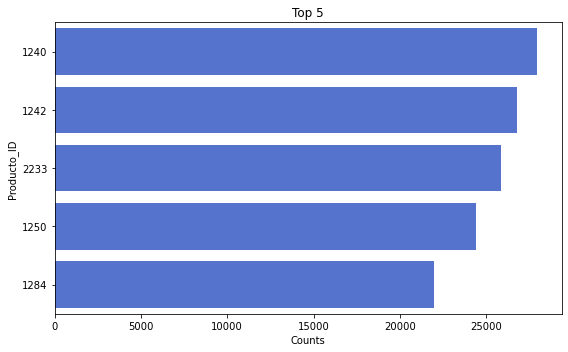

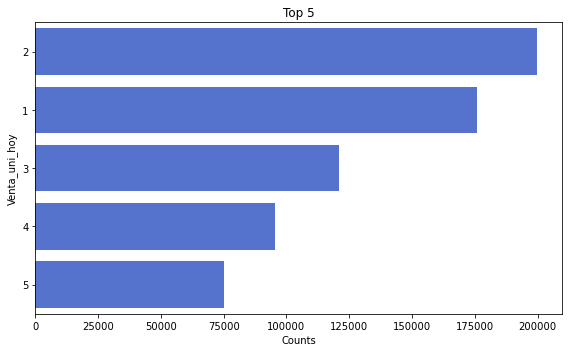

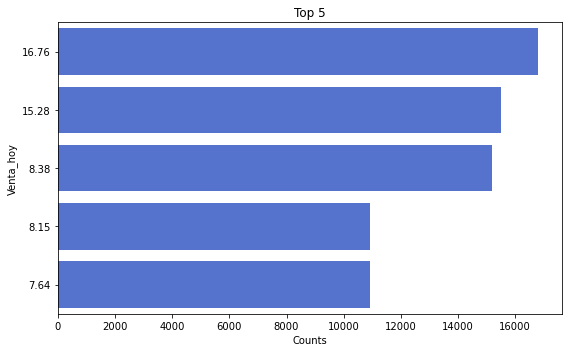

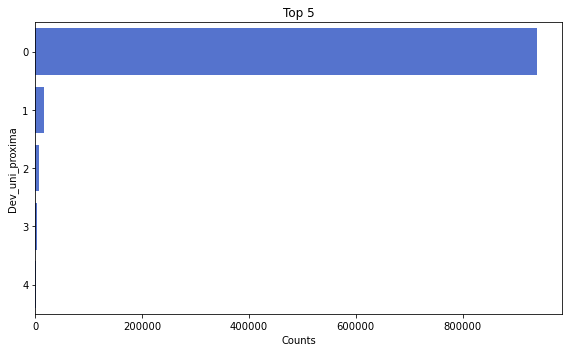

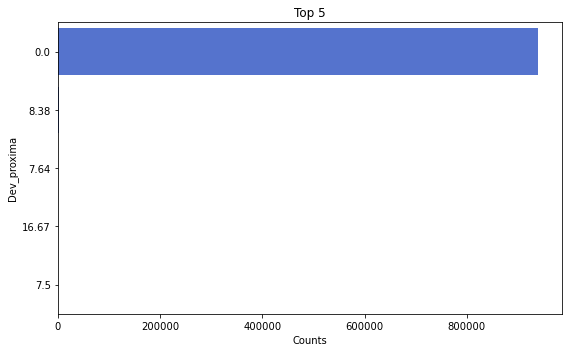

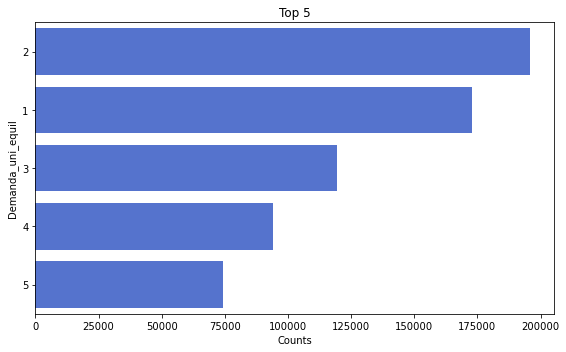

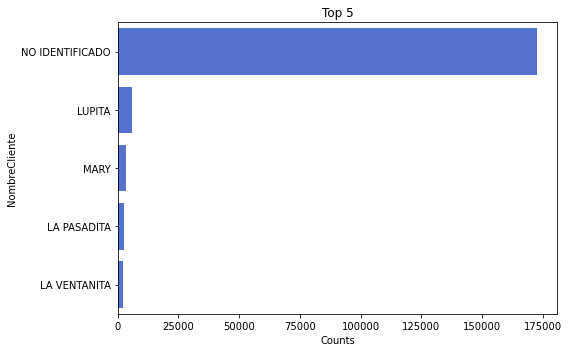

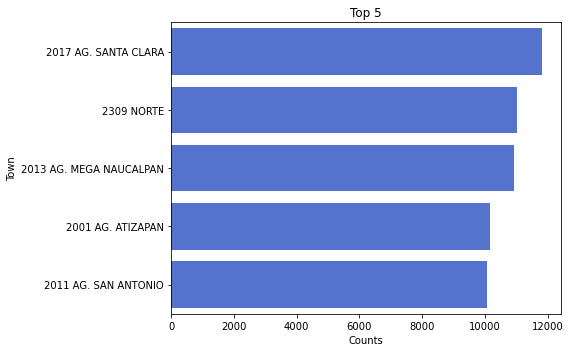

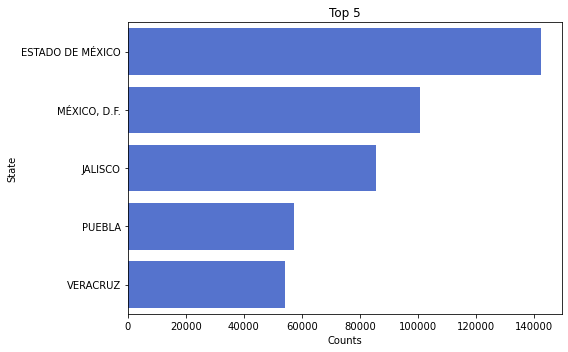

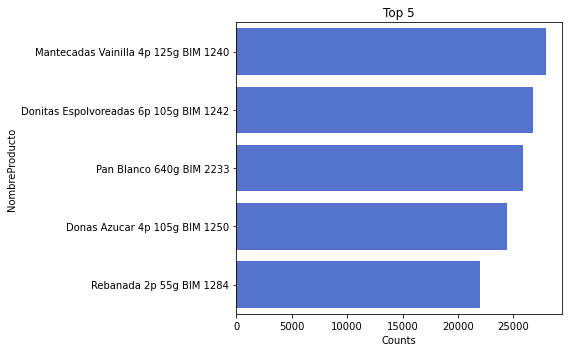

In [9]:
save_all_countplot(df, "final_table")

In [11]:
CalcOutliers(df.Venta_uni_hoy)

Identified lowest outliers: 0
Identified upper outliers: 8562
Identified outliers: 8562
Non-outlier observations: 963414
Total percentual of Outliers:  0.8887


In [18]:
df.corr()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Semana,1.000000,-0.000246,0.008419,-0.002967,0.002486,0.013571,0.003763,0.003382,0.004650,0.002375,0.003484
Agencia_ID,-0.000246,1.000000,-0.038890,-0.007556,0.017183,0.006979,-0.006406,-0.007942,-0.000997,-0.000889,-0.006390
Canal_ID,0.008419,-0.038890,1.000000,0.474583,0.074074,0.028630,0.133913,0.121280,0.027619,0.011970,0.133306
Ruta_SAK,-0.002967,-0.007556,0.474583,1.000000,0.080465,0.281865,0.053035,0.026483,0.001988,-0.003478,0.053599
Cliente_ID,0.002486,0.017183,0.074074,0.080465,1.000000,-0.002174,-0.016169,-0.017486,-0.003488,-0.002438,-0.015822
Producto_ID,0.013571,0.006979,0.028630,0.281865,-0.002174,1.000000,0.047243,0.018040,0.012052,0.005276,0.046859
Venta_uni_hoy,0.003763,-0.006406,0.133913,0.053035,-0.016169,0.047243,1.000000,0.794455,0.114609,0.046116,0.996402
Venta_hoy,0.003382,-0.007942,0.121280,0.026483,-0.017486,0.018040,0.794455,1.000000,0.074668,0.048069,0.792991
Dev_uni_proxima,0.004650,-0.000997,0.027619,0.001988,-0.003488,0.012052,0.114609,0.074668,1.000000,0.386615,0.043321
Dev_proxima,0.002375,-0.000889,0.011970,-0.003478,-0.002438,0.005276,0.046116,0.048069,0.386615,1.000000,0.025421


In [17]:

corr["Demanda_uni_equil"].sort_values(ascending=False)

Demanda_uni_equil    1.000000
Venta_uni_hoy        0.996402
Venta_hoy            0.792991
Canal_ID             0.133306
Ruta_SAK             0.053599
Producto_ID          0.046859
Dev_uni_proxima      0.043321
Dev_proxima          0.025421
Semana               0.003484
Agencia_ID          -0.006390
Cliente_ID          -0.015822
Name: Demanda_uni_equil, dtype: float64

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Semana,1.000000,-0.000246,0.008419,-0.002967,0.002486,0.013571,0.003763,0.003382,0.004650,0.002375,0.003484
Agencia_ID,-0.000246,1.000000,-0.038890,-0.007556,0.017183,0.006979,-0.006406,-0.007942,-0.000997,-0.000889,-0.006390
Canal_ID,0.008419,-0.038890,1.000000,0.474583,0.074074,0.028630,0.133913,0.121280,0.027619,0.011970,0.133306
Ruta_SAK,-0.002967,-0.007556,0.474583,1.000000,0.080465,0.281865,0.053035,0.026483,0.001988,-0.003478,0.053599
Cliente_ID,0.002486,0.017183,0.074074,0.080465,1.000000,-0.002174,-0.016169,-0.017486,-0.003488,-0.002438,-0.015822
Producto_ID,0.013571,0.006979,0.028630,0.281865,-0.002174,1.000000,0.047243,0.018040,0.012052,0.005276,0.046859
Venta_uni_hoy,0.003763,-0.006406,0.133913,0.053035,-0.016169,0.047243,1.000000,0.794455,0.114609,0.046116,0.996402
Venta_hoy,0.003382,-0.007942,0.121280,0.026483,-0.017486,0.018040,0.794455,1.000000,0.074668,0.048069,0.792991
Dev_uni_proxima,0.004650,-0.000997,0.027619,0.001988,-0.003488,0.012052,0.114609,0.074668,1.000000,0.386615,0.043321
Dev_proxima,0.002375,-0.000889,0.011970,-0.003478,-0.002438,0.005276,0.046116,0.048069,0.386615,1.000000,0.025421


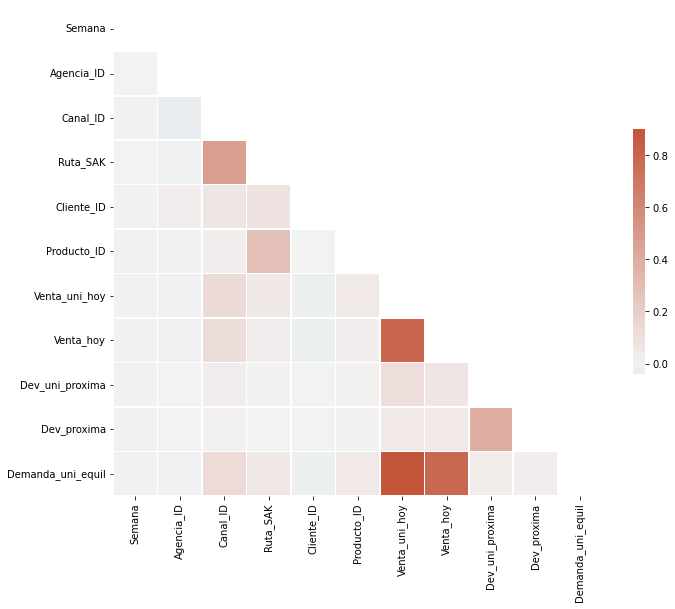

In [32]:
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

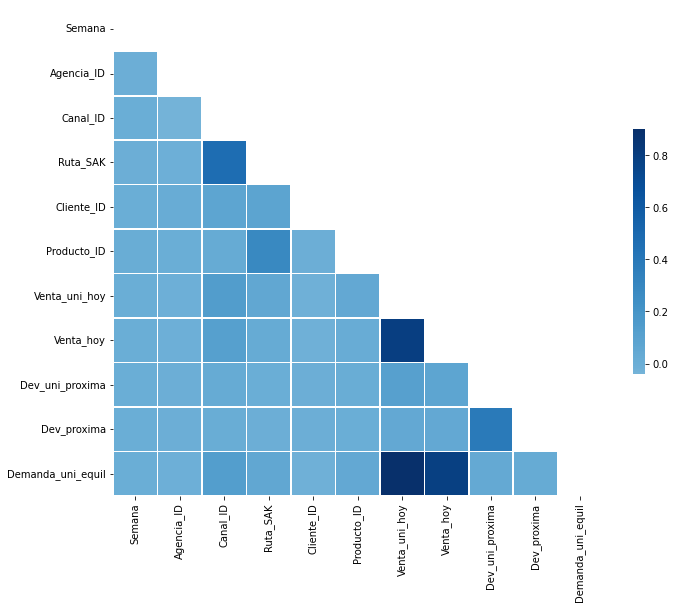

In [31]:

corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});